# 全球大気モデル150年連続実験のハンドリングと可視化（２）

07_AGCM150yr.ipynbで1950年から2014年の間の全球地上気温を抽出し、netcdf形式のファイルに保存した。
ここでは、そのファイルを読み込み、気候値・偏差の作成、空間平均などの作業を行う。

ライブラリーをインポートする。

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator)

In [2]:
nameIn = "./tas.HFD.1950-2014.nc"
ds = xr.open_dataset(nameIn)
ds

/usr/local/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.20.0
  warnings.warn(


<xarray.Dataset> Size: 639MB
Dimensions:  (time: 780, lon: 640, lat: 320)
Coordinates:
  * time     (time) datetime64[ns] 6kB 1950-01-01 1950-02-01 ... 2014-12-01
  * lon      (lon) float64 5kB 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
  * lat      (lat) float64 3kB -89.57 -89.01 -88.45 -87.89 ... 88.45 89.01 89.57
Data variables:
    tas      (time, lat, lon) float32 639MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Wed Dec 04 10:21:52 2024: cdo mergetime tas.1950-1959.nc ta...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

## とりあえず可視化してみる

最初の時刻の地上気温を可視化してみる。

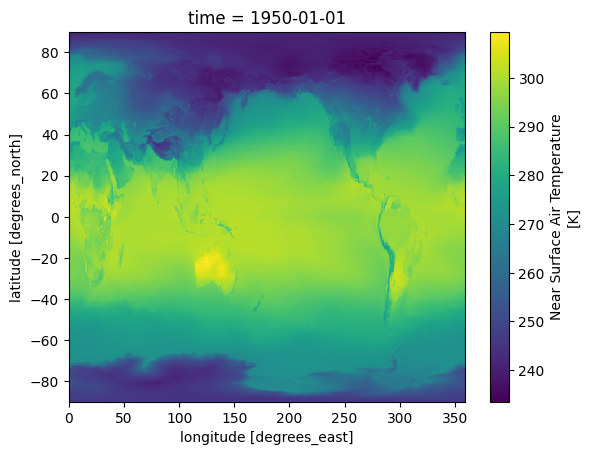

In [3]:
ds["tas"][0,:,:].plot()

次のように変数を指定することもできる。

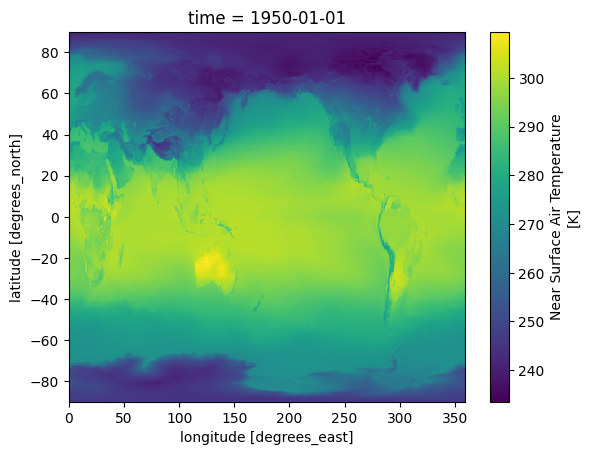

In [4]:
ds.tas[0,:,:].plot()

緯度、経度、最初の時刻の地上気温のデータを抽出する。

In [5]:
lon = ds["lon"]
lat = ds["lat"]
tas = ds["tas"][0,:,:]

海岸線を描き、経度方向は60度ごと、緯度方向は30度ごとにグリッド線を描く。そして気温を色の陰影で描く。

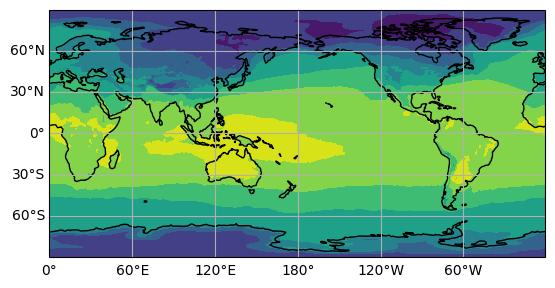

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=180))
plt.contourf(lon, lat, tas, transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 60))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 30))
gl.top_labels = False
gl.right_labels = False

ロビンソン図法で地上気温を描く。

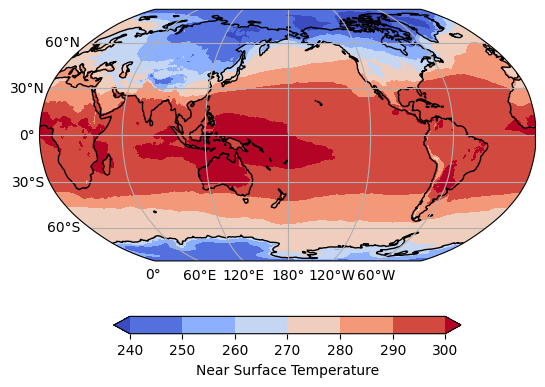

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=180))
cs = ax.contourf(lon, lat, tas, 
                 transform=ccrs.PlateCarree(),
                 cmap="coolwarm",
                 extend="both")
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 60))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 30))
gl.top_labels = False
gl.right_labels = False
cbar = plt.colorbar(cs, shrink=0.7,
                    orientation="horizontal",
                    label="Near Surface Temperature"
                   )

北緯50度、東経110度に最も近い格子点の地上気温の時系列を可視化する。

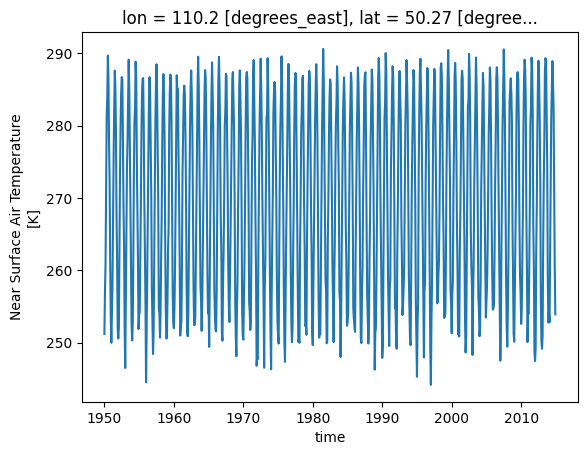

In [8]:
ds["tas"].sel(lat=50, lon=110, method="nearest").plot()

1981年から2010年の間の30年間のデータを用いて気候値を作成する。``groupby()``で各月ごとで計算する設定を行い、平均値を計算するため``mean()``を用いる。

In [9]:
clim1 = ds.tas.sel(time=slice("1981-01-01","2010-12-31")).groupby("time.month").mean(dim="time")
clim1

<xarray.DataArray 'tas' (month: 12, lat: 320, lon: 640)> Size: 10MB
array([[[247.84454, 247.83998, 247.83517, ..., 247.8581 , 247.85345,
         247.84915],
        [248.14542, 248.1374 , 248.12881, ..., 248.16895, 248.16104,
         248.15363],
        [248.39981, 248.38957, 248.37845, ..., 248.43239, 248.42152,
         248.41121],
        ...,
        [246.24454, 246.24847, 246.25372, ..., 246.22809, 246.23395,
         246.23874],
        [245.90962, 245.91148, 245.914  , ..., 245.90155, 245.9046 ,
         245.90666],
        [245.59381, 245.59468, 245.59584, ..., 245.59036, 245.59181,
         245.59264]],

       [[240.33315, 240.3298 , 240.32524, ..., 240.34592, 240.34175,
         240.33759],
        [240.54027, 240.53276, 240.52411, ..., 240.56467, 240.5563 ,
         240.54886],
        [240.74976, 240.73756, 240.72343, ..., 240.78996, 240.77606,
         240.7637 ],
...
        [249.73755, 249.74358, 249.75034, ..., 249.71625, 249.72353,
         249.73021],
        [249.5501 , 249.55429, 249.5587 , ..., 249.53574, 249.54088,
         249.5451 ],
        [249.38008, 249.38258, 249.38528, ..., 249.3716 , 249.3748 ,
         249.37717]],

       [[248.96109, 248.9566 , 248.95172, ..., 248.97508, 248.97035,
         248.96599],
        [249.26283, 249.25507, 249.24626, ..., 249.28714, 249.27899,
         249.27129],
        [249.49706, 249.48663, 249.47533, ..., 249.53024, 249.51875,
         249.50844],
        ...,
        [246.70122, 246.70557, 246.71088, ..., 246.6843 , 246.69017,
         246.69551],
        [246.457  , 246.4598 , 246.46251, ..., 246.44743, 246.45084,
         246.45377],
        [246.23389, 246.23535, 246.23715, ..., 246.2282 , 246.2304 ,
         246.23196]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 5kB 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
  * lat      (lat) float64 3kB -89.57 -89.01 -88.45 -87.89 ... 88.45 89.01 89.57
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:     air_temperature
    long_name:         Near Surface Air Temperature
    units:             K
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  160

地上気温の1月の気候値を可視化してみる。

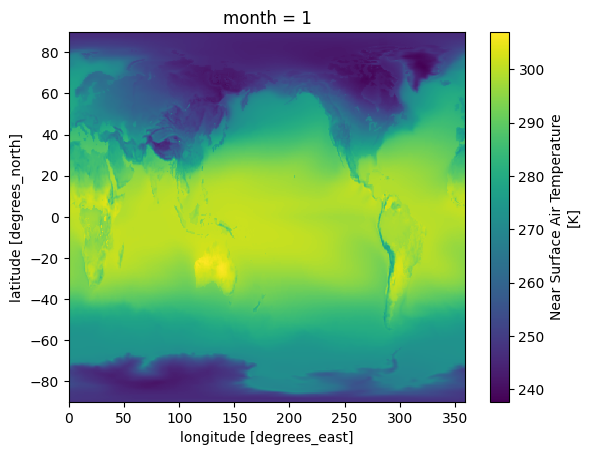

In [10]:
clim1.isel(month=0).plot()

作成した気候値からの偏差を求める。ここでも``groupby()``を用いる。
なお、ds["tas"]と書いても、ds.tasと書いても同じ結果が得られる。

In [11]:
anom1 = ds.tas.groupby("time.month") - clim1
anom1

<xarray.DataArray 'tas' (time: 780, lat: 320, lon: 640)> Size: 639MB
array([[[-1.2472534 , -1.2457733 , -1.2448273 , ..., -1.2489777 ,
         -1.2484131 , -1.2478943 ],
        [-1.1577454 , -1.1549683 , -1.1524506 , ..., -1.1651917 ,
         -1.1630096 , -1.1600494 ],
        [-1.1265106 , -1.1222229 , -1.1182098 , ..., -1.1398773 ,
         -1.1356506 , -1.1309662 ],
        ...,
        [-3.639389  , -3.6311188 , -3.62117   , ..., -3.6665497 ,
         -3.6570587 , -3.6486206 ],
        [-3.6837006 , -3.7089233 , -3.6686554 , ..., -3.7309723 ,
         -3.7013702 , -3.6598358 ],
        [-3.5012054 , -3.5588837 , -3.4875793 , ..., -3.5725708 ,
         -3.5208588 , -3.4479065 ]],

       [[-0.07846069, -0.07867432, -0.07757568, ..., -0.08201599,
         -0.08088684, -0.07971191],
        [ 0.17866516,  0.18069458,  0.18312073, ...,  0.16957092,
          0.1726532 ,  0.17390442],
        [ 0.40863037,  0.41207886,  0.41716003, ...,  0.39411926,
          0.39811707,  0.40252686],
...
        [ 0.06091309,  0.06416321,  0.06808472, ...,  0.05010986,
          0.05436707,  0.05728149],
        [-0.14334106, -0.14207458, -0.14068604, ..., -0.14639282,
         -0.14556885, -0.14411926],
        [-0.22485352, -0.22517395, -0.22569275, ..., -0.22306824,
         -0.22390747, -0.22402954]],

       [[-1.0995941 , -1.1010284 , -1.101593  , ..., -1.0960541 ,
         -1.09758   , -1.0980835 ],
        [-1.054245  , -1.057312  , -1.0595245 , ..., -1.046341  ,
         -1.0493774 , -1.0521545 ],
        [-0.9745331 , -0.9780731 , -0.9833374 , ..., -0.96281433,
         -0.9682617 , -0.97195435],
        ...,
        [ 5.280655  ,  5.270584  ,  5.2611084 , ...,  5.3106995 ,
          5.3011627 ,  5.2904205 ],
        [ 5.1453857 ,  5.139038  ,  5.1330414 , ...,  5.165573  ,
          5.15802   ,  5.1517487 ],
        [ 5.066223  ,  5.063568  ,  5.0604553 , ...,  5.0751953 ,
          5.071945  ,  5.0693054 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 6kB 1950-01-01 1950-02-01 ... 2014-12-01
  * lon      (lon) float64 5kB 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
  * lat      (lat) float64 3kB -89.57 -89.01 -88.45 -87.89 ... 88.45 89.01 89.57
    month    (time) int64 6kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

北緯50度、東経110度に最も近い格子点の偏差の時系列を可視化する。

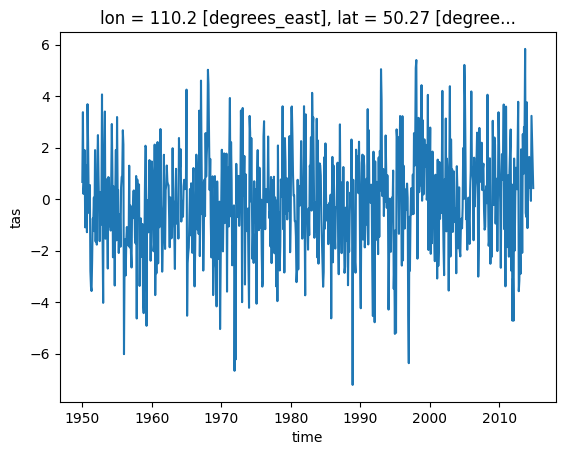

In [12]:
anom1.sel(lat=50, lon=110, method="nearest").plot()

各年の年平均値を求める。

In [13]:
anom1_yr = anom1.sel(lat=50, lon=110, method="nearest").resample(time='1YS').mean()

``rolling()``を用いて、11年移動平均を求める。

In [14]:
anom1_smth11 = anom1_yr.rolling(time=11, center=True).mean()

地上気温の気候値からの偏差の年平均値とその11年移動平均値をプロットする。

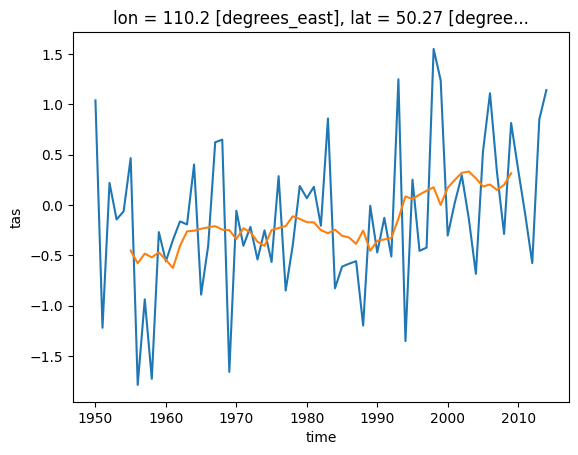

In [15]:
anom1_yr.plot()
anom1_smth11.plot()

## 領域平均値の作成

大気大循環モデルは大気を格子に分割して、大気に関する方程式を積分している。その格子が代表する面積は極に近づくほど狭くなる。
そこで領域平均値を計算する際には、CMIPのように各格子の面積データが提供されている場合はその面積データを、
面積データが提供されていない場合には格子点の緯度のコサインを求め、重み付けを考慮して平均値を求める。

北緯50度〜北緯60度、東経100度〜東経110度の領域の地上気温偏差の領域平均値を計算する。まず緯度のコサインを用いて面積の重みを作成する。

In [16]:
anom_box1 = anom1.sel(lat=slice(50,60), lon=slice(100,110))

In [17]:
weights1 = np.cos(np.deg2rad(anom_box1.lat))
weights1.name = "weights"

In [18]:
anom_r1 = anom_box1.weighted(weights1).mean(('lon','lat'), skipna=True)

領域平均値の時系列をプロットする。

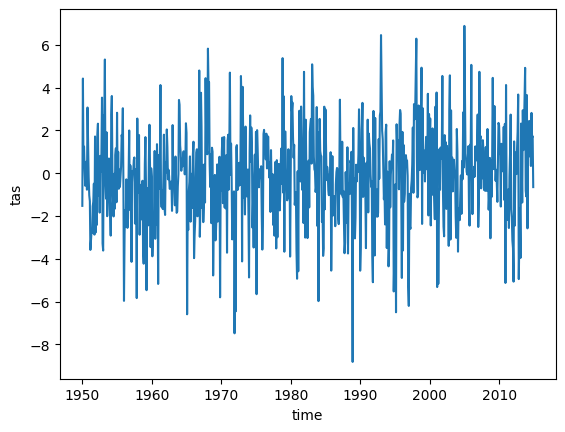

In [19]:
anom_r1.plot()

領域平均値の年平均値を求める。

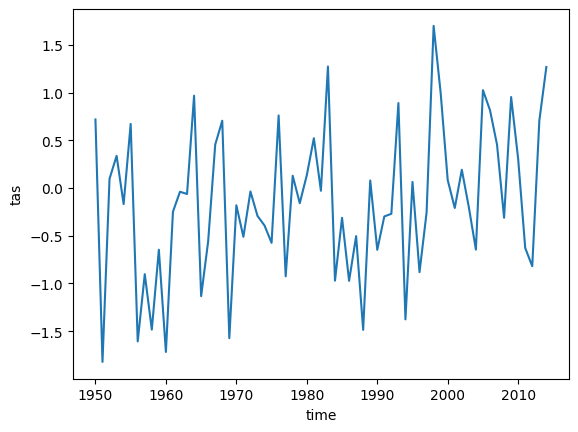

In [21]:
anom_r_y1 = anom_r1.resample(time='YS').mean()
anom_r_y1.plot()

## 練習

1. 北緯60度以北だけを対象とし、地上気温偏差の領域平均値（北極圏平均地上気温偏差）を作成しなさい。

2. 北極圏平均地上気温偏差の年平均値を作成しなさい。

3. ２で作成した年平均値に11年移動平均を適用しなさい。

4. 2と3で作成したデータを可視化しなさい。

5. 将来予測実験のいずれかのRCPシナリオから地上気温データを抽出しなさい。抽出した地上気温データはnetcdf形式のファイルに保存しなさい。

6. 5で抽出した地上気温データから気候値(clim1)を引くことで、地上気温の偏差データを作成しなさい。

7. ６で作成した地上気温偏差データから北極圏平均地上気温偏差を作成したうえで、年平均値とその11年移動平均値を作成しなさい。

8. ３で作成した過去再現実験の北極圏平均地上気温偏差の11年移動平均値と7で作成した11年移動平均を重ね書きで可視化しなさい。